# Agrupamiento K-means 

En este ejercicio, implementarás el algoritmo K-means y lo usarás para compresión de imágenes.

* Comenzarás con un conjunto de datos de ejemplo que te ayudará a obtener una intuición de cómo funciona el algoritmo K-means.
* Luego, usarás el algoritmo K-means para la compresión de imágenes reduciendo la cantidad de colores que aparecen en una imagen a solo aquellos que son más comunes en esa imagen.




# Contenido
- [ 1 - Implementando K-means](#1)
  - [ 1.1 Encontrando los centroides más cercanos](#1.1)
    - [ Ejercicio 1](#ex01)
  - [ 1.2 Calculando los promedios de los centroides](#1.2)
    - [ Ejercicio 2](#ex02)
- [ 2 - K-means en un conjunto de datos de ejemplo ](#2)
- [ 3 - Inicialización aleatoria](#3)
- [ 4 - Compresión de imágenes con K-means](#4)
  - [ 4.1 Conjunto de datos](#4.1)
  - [ 4.2 K-Means en los píxeles de la imagen](#4.2)
  - [ 4.3 Comprimir la imagen](#4.3)


_**NOTA:** Para evitar errores con el autocalificador, no se permite editar ni eliminar celdas no calificadas en este ejercicio. Por favor, tampoco agregues nuevas celdas.
**Una vez que hayas aprobado este ejercicio** y quieras experimentar con cualquier código no calificado, puedes seguir las instrucciones al final de este cuaderno._

Primero, ejecuta la siguiente celda para importar los paquetes necesarios en este ejercicio:

- [numpy](https://numpy.org/) es el paquete fundamental para computación científica con Python.
- [matplotlib](http://matplotlib.org) es una biblioteca popular para graficar en Python.
- `utils.py` contiene funciones auxiliares para este ejercicio. No necesitas modificar el código en este archivo.

In [1]:
import numpy as np # importar numpy para operaciones numéricas #
import matplotlib.pyplot as plt # importar matplotlib para graficar #
from utils import * # importar funciones auxiliares del archivo utils.py #
%matplotlib inline 


<a name="1"></a>
## 1 - Implementando K-means

El algoritmo K-means es un método para agrupar automáticamente puntos de datos similares.

* Concretamente, se te da un conjunto de entrenamiento $\{x^{(1)}, ..., x^{(m)}\}$, y quieres agrupar los datos en unos pocos "clusters" cohesivos.


* K-means es un procedimiento iterativo que
     * Comienza adivinando los centroides iniciales, y luego
     * Refina esta suposición
         * Asignando repetidamente ejemplos a sus centroides más cercanos, y luego
         * Recalculando los centroides basándose en las asignaciones.

* En pseudocódigo, el algoritmo K-means es el siguiente:

    ``` python
    # Inicializar centroides
    # K es el número de clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Paso de asignación de clusters:
        # Asignar cada punto de datos al centroide más cercano.
        # idx[i] corresponde al índice del centroide
        # asignado al ejemplo i
        idx = find_closest_centroids(X, centroids)

        # Paso de mover centroides:
        # Calcular los promedios basados en las asignaciones de centroides
        centroids = compute_centroids(X, idx, K)
    ```


* El ciclo interno del algoritmo realiza repetidamente dos pasos:
    1. Asignar cada ejemplo de entrenamiento $x^{(i)}$ a su centroide más cercano, y
    2. Recalcular el promedio de cada centroide usando los puntos asignados a él.

* El algoritmo K-means siempre convergerá a un conjunto final de promedios para los centroides.

* Sin embargo, la solución a la que converge puede no ser siempre ideal y depende de la configuración inicial de los centroides.
    * Por lo tanto, en la práctica el algoritmo K-means suele ejecutarse varias veces con diferentes inicializaciones aleatorias.
    * Una forma de elegir entre estas diferentes soluciones de diferentes inicializaciones aleatorias es elegir la que tenga el valor más bajo de la función de costo (distorsión).

Implementarás las dos fases del algoritmo K-means por separado en las siguientes secciones.
* Comenzarás completando `find_closest_centroid` y luego procederás a completar `compute_centroids`.

<a name="1.1"></a>
### 1.1 Encontrando los centroides más cercanos

En la fase de “asignación de clusters” del algoritmo K-means, el algoritmo asigna cada ejemplo de entrenamiento $x^{(i)}$ a su centroide más cercano, dados los centroides actuales.

<a name="ex01"></a>
### Ejercicio 1

Tu tarea es completar el código en `find_closest_centroids`.
* Esta función toma la matriz de datos `X` y las ubicaciones de todos los centroides en `centroids`
* Debe devolver un array unidimensional `idx` (que tiene el mismo número de elementos que `X`) que contiene el índice del centroide más cercano (un valor en $\{0,...,K-1\}$, donde $K$ es el número total de centroides) para cada ejemplo de entrenamiento. *(Nota: El rango de índices de 0 a K-1 varía ligeramente de lo mostrado en las clases (es decir, de 1 a K) porque los índices de listas en Python comienzan en 0 en lugar de 1)*
* Específicamente, para cada ejemplo $x^{(i)}$ establecemos
$$c^{(i)} := j \quad \mathrm{que \; minimiza} \quad ||x^{(i)} - \mu_j||^2,$$
donde
 * $c^{(i)}$ es el índice del centroide más cercano a $x^{(i)}$ (corresponde a `idx[i]` en el código base), y
 * $\mu_j$ es la posición (valor) del $j$-ésimo centroide (almacenado en `centroids` en el código base)
 * $||x^{(i)} - \mu_j||$ es la norma L2

Si te atascas, puedes consultar las pistas presentadas después de la celda siguiente para ayudarte con la implementación.

In [2]:
# UNQ_C1
# FUNCIÓN CALIFICADA: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Calcula la pertenencia de cada ejemplo a un centroide
    
    Args:
        X (ndarray): (m, n) Valores de entrada
        centroids (ndarray): (K, n) centroides
    
    Returns:
        idx (array_like): (m,) centroides más cercanos
    
    """

    # Definir K
    K = centroids.shape[0]

    # Debes devolver las siguientes variables correctamente
    idx = np.zeros(X.shape[0], dtype=int)

    ### INICIA TU CÓDIGO AQUÍ ###
    
    # Para cada ejemplo, calcular la distancia al cuadrado a cada centroide
    # y asignar el índice del centroide más cercano.
    # Explicación: Este bucle recorre cada ejemplo en X y calcula la distancia euclidiana al cuadrado entre ese ejemplo y cada uno de los centroides. 
    # Luego, asigna a idx[i] el índice del centroide más cercano (el de menor distancia). Así, cada punto queda agrupado según el centroide más próximo, 
    # que es el paso de asignación en el algoritmo K-means.
    
    for i in range(X.shape[0]):
        # Distancias euclidianas al cuadrado a todos los centroides
        dists = np.sum((centroids - X[i, :])**2, axis=1)
        idx[i] = np.argmin(dists)
        
### TERMINA TU CÓDIGO AQUÍ ###
    
    return idx

**Explicación (find_closest_centroids):**  
Para cada ejemplo \(x_i\), se calcula la distancia euclidiana al cuadrado respecto a cada centroide \(\mu_k\) y se asigna el índice del centroide con menor distancia:  
\( \operatorname*{argmin}_k \lVert x_i - \mu_k \rVert^2 \).

<details>
  <summary><font size="3" color="darkgreen"><b>Haz clic para ver pistas</b></font></summary>
    
    
* Así puedes estructurar la implementación general de esta función

```python 
def find_closest_centroids(X, centroids):

    # Definir K
    K = centroids.shape[0]

    # Debes devolver las siguientes variables correctamente
    idx = np.zeros(X.shape[0], dtype=int)

    ### INICIA TU CÓDIGO AQUÍ ###
    for i in range(X.shape[0]):
        # Array para guardar la distancia entre X[i] y cada centroids[j]
        distance = [] 
        for j in range(centroids.shape[0]):
            norm_ij = # Tu código para calcular la norma entre (X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = # Tu código aquí para calcular el índice del valor mínimo en distance
    ### TERMINA TU CÓDIGO AQUÍ ###
    return idx
```

* Si aún tienes dudas, puedes consultar las pistas presentadas abajo para saber cómo calcular `norm_ij` y `idx[i]`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Pista para calcular norm_ij</b></font></summary>
           &emsp; &emsp; Puedes usar <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html">np.linalg.norm</a> para calcular la norma          
    </details>

    <details>
          <summary><font size="2" color="darkblue"><b>Pista para calcular idx[i]</b></font></summary>
          &emsp; &emsp; Puedes usar <a href="https://numpy.org/doc/stable/reference/generated/numpy.argmin.html">np.argmin</a> para encontrar el índice del valor mínimo          
    </details>
        
    </details>

</details>

    


Ahora vamos a comprobar tu implementación usando un conjunto de datos de ejemplo

In [3]:
# Cargar un conjunto de datos de ejemplo que usaremos
X = load_data()

El siguiente código imprime los primeros cinco elementos de la variable `X` y las dimensiones de la variable

In [4]:
print("Los primeros cinco elementos de X son:\n", X[:5]) 
print('La forma(shape) de X es:', X.shape)

Los primeros cinco elementos de X son:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
La forma(shape) de X es: (300, 2)


In [5]:
# Seleccionar un conjunto inicial de centroides (3 centroides)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Encontrar los centroides más cercanos usando initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Imprimir los centroides más cercanos para los primeros tres elementos
print("Los primeros tres elementos en idx son:", idx[:3])

# PRUEBA UNITARIA
from public_tests import *

find_closest_centroids_test(find_closest_centroids)

Los primeros tres elementos en idx son: [0 2 1]
All tests passed!


**Salida esperada**:

| Primeros tres elementos en idx son | [0 2 1] |
|------------------------------------|---------|

<a name="1.2"></a>
### 1.2 Calculando los promedios de los centroides

Dadas las asignaciones de cada punto a un centroide, la segunda fase del algoritmo recalcula, para cada centroide, el promedio de los puntos que le fueron asignados.


<a name="ex02"></a>
### Ejercicio 2

Por favor, completa la función `compute_centroids` a continuación para recalcular el valor de cada centroide

* Específicamente, para cada centroide $\mu_k$ establecemos
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    donde
    * $C_k$ es el conjunto de ejemplos asignados al centroide $k$
    * $|C_k|$ es el número de ejemplos en el conjunto $C_k$


* Concretamente, si dos ejemplos digamos $x^{(3)}$ y $x^{(5)}$ están asignados al centroide $k=2$,
entonces debes actualizar $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

Si te atascas, puedes consultar las pistas presentadas después de la celda siguiente para ayudarte con la implementación.

In [6]:
# UNQ_C2
# FUNCIÓN CALIFICADA: compute_centroids

def compute_centroids(X, idx, K):
    """
    Devuelve los nuevos centroides calculando los promedios de los
    puntos de datos asignados a cada centroide.
    
    Args:
        X (ndarray):   (m, n) Puntos de datos
        idx (ndarray): (m,) Array que contiene el índice del centroide más cercano para cada
                       ejemplo en X. Concretamente, idx[i] contiene el índice del
                       centroide más cercano al ejemplo i
        K (int):       número de centroides
    
    Returns:
        centroids (ndarray): (K, n) Nuevos centroides calculados
    """
    
    # Variables útiles
    m, n = X.shape
    
    # Debes devolver las siguientes variables correctamente
    centroids = np.zeros((K, n))
    
    ### INICIA TU CÓDIGO AQUÍ ###
    # Recalcular cada centroide como el promedio de los puntos
    # que le fueron asignados. Si un centroide no tiene puntos,
    # se mantiene sin cambio (promedio sobre conjunto vacío no definido).

    for k in range(K):  # Para cada centroide k
        points = X[idx == k]  # Selecciona los puntos asignados al centroide k
        if points.shape[0] > 0:  # Si hay puntos asignados al centroide k
            centroids[k, :] = np.mean(points, axis=0)  # Calcula el promedio y actualiza el centroide k
    ### TERMINA TU CÓDIGO AQUÍ ## 
    
    return centroids

**Explicación (compute_centroids):**  
Para cada grupo \(k\), se recalcula el centroide como el promedio de los puntos asignados:  
\( \mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i \).  
Si un centroide no recibe puntos, se mantiene el valor previo.

<details>
  <summary><font size="3" color="darkgreen"><b>Haz clic para ver pistas</b></font></summary>
    
    
* Así puedes estructurar la implementación general de esta función
    ```python 
    def compute_centroids(X, idx, K):
        # Variables útiles
        m, n = X.shape
    
        # Debes devolver las siguientes variables correctamente
        centroids = np.zeros((K, n))
    
        ### INICIA TU CÓDIGO AQUÍ ###
        for k in range(K):   
            points = # Tu código aquí para obtener una lista de todos los puntos de datos en X asignados al centroide k
            centroids[k] = # Tu código aquí para calcular el promedio de los puntos asignados
    ### TERMINA TU CÓDIGO AQUÍ ## 
    
    return centroids
    ```
  
    Si aún tienes dudas, puedes consultar las pistas presentadas abajo para saber cómo calcular `points` y `centroids[k]`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Pista para calcular points</b></font></summary>
           &emsp; &emsp; Si queremos encontrar todos los valores en X que fueron asignados al cluster <code>k=0</code>. Es decir, el valor correspondiente en idx para estos ejemplos es 0. En Python, podemos hacerlo como <code>X[idx == 0]</code>. De manera similar, los puntos asignados al centroide <code>k=1</code> son <code>X[idx == 1]</code>          
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Pista para calcular centroids[k]</b></font></summary>
          &emsp; &emsp; Puedes usar <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html">np.mean</a> para encontrar el promedio. Asegúrate de establecer el parámetro <code>axis=0</code>          
    </details>
        
    </details>

</details>

    


Ahora verifica tu implementación ejecutando la siguiente celda

In [7]:
K = 3
centroids = compute_centroids(X, idx, K)

print("Los centroides son:", centroids)

# PRUEBA UNITARIA
compute_centroids_test(compute_centroids)

Los centroides son: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


**Salida esperada**:

2.42830111 3.15792418

5.81350331 2.63365645

7.11938687 3.6166844 

<a name="2"></a>
## 2 - K-means en un conjunto de datos de ejemplo 

Después de haber completado las dos funciones (`find_closest_centroids` y `compute_centroids`) arriba, el siguiente paso es ejecutar el algoritmo K-means en un conjunto de datos 2D de juguete para ayudarte a entender cómo funciona K-means.
* Te animamos a que revises la función (`run_kMeans`) a continuación para entender cómo funciona.
* Observa que el código llama a las dos funciones que implementaste en un bucle.

Cuando ejecutes el código a continuación, producirá una visualización que muestra el progreso del algoritmo en cada iteración.
* Al final, tu figura debería verse como la que se muestra en la Figura 1.
* Los centroides finales son las marcas X negras en el centro de los clusters coloreados.
* Puedes ver cómo estos centroides llegaron a su ubicación final mirando las otras marcas X conectadas a ellos.

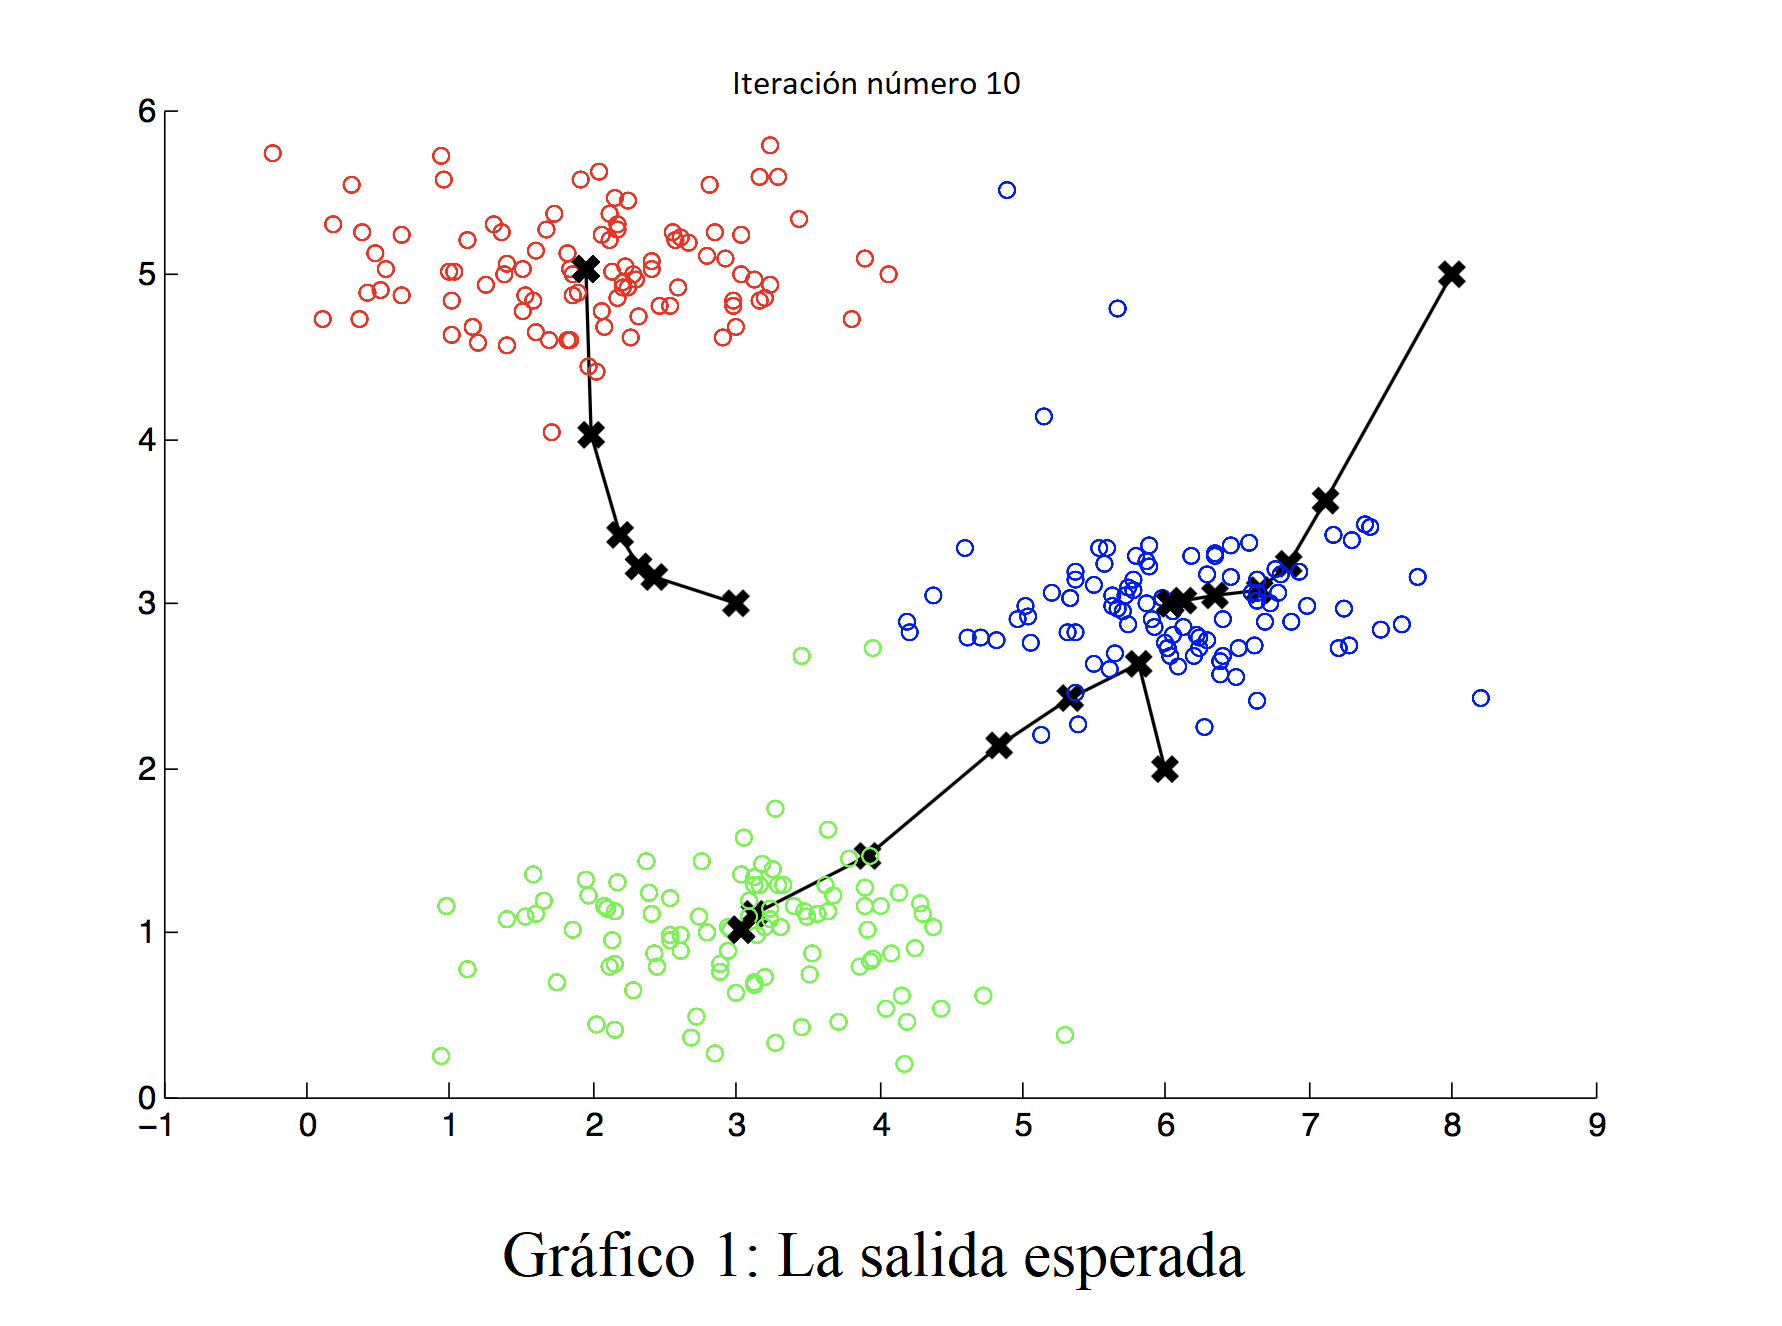

**Nota**: No necesitas implementar nada en esta parte. Simplemente ejecuta el código proporcionado a continuación

In [8]:
# No necesitas implementar nada en esta parte

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Ejecuta el algoritmo K-Means en la matriz de datos X, donde cada fila de X
    es un solo ejemplo
    """
    
    # Inicializar valores
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Ejecutar K-Means
    for i in range(max_iters):
        
        #Mostrar progreso
        print("K-Means iteración %d/%d" % (i, max_iters-1))
        
        # Para cada ejemplo en X, asignarlo al centroide más cercano
        idx = find_closest_centroids(X, centroids)
        
        # Opcionalmente graficar el progreso
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Dados los clusters, calcular nuevos centroides
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteración 0/9
K-Means iteración 1/9
K-Means iteración 2/9
K-Means iteración 3/9
K-Means iteración 4/9
K-Means iteración 5/9
K-Means iteración 6/9
K-Means iteración 7/9
K-Means iteración 8/9
K-Means iteración 9/9


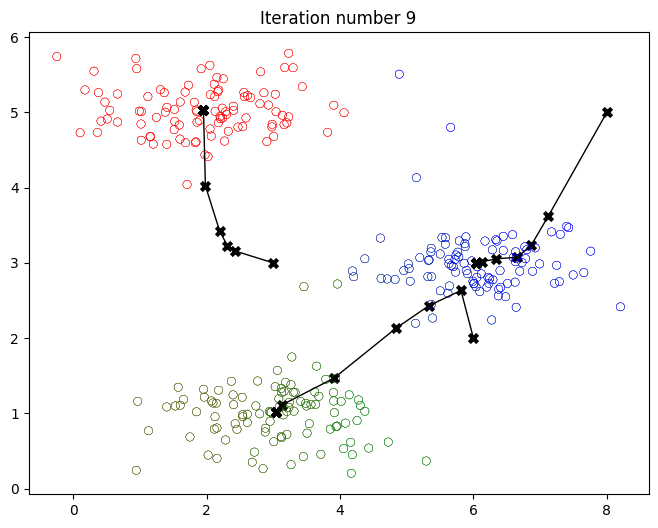

In [9]:
# Cargar un conjunto de datos de ejemplo
X = load_data()

# Definir centroides iniciales
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Número de iteraciones
max_iters = 10

# Ejecutar K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="3"></a>
## 3 - Inicialización aleatoria

Las asignaciones iniciales de centroides para el conjunto de datos de ejemplo fueron diseñadas para que veas la misma figura que en la Figura 1. En la práctica, una buena estrategia para inicializar los centroides es seleccionar ejemplos aleatorios del conjunto de entrenamiento.

En esta parte del ejercicio, debes entender cómo se implementa la función `kMeans_init_centroids`.
* El código primero baraja aleatoriamente los índices de los ejemplos (usando `np.random.permutation()`).
* Luego, selecciona los primeros $K$ ejemplos basados en la permutación aleatoria de los índices.
* Esto permite que los ejemplos se seleccionen al azar sin el riesgo de seleccionar el mismo ejemplo dos veces.

**Nota**: No necesitas implementar nada en esta parte del ejercicio.

In [10]:
# No necesitas modificar esta parte

def kMeans_init_centroids(X, K):
    """
    Esta función inicializa K centroides que serán
    usados en K-Means en el conjunto de datos X
    
    Args:
        X (ndarray): Puntos de datos
        K (int):     número de centroides/clusters
    
    Returns:
        centroids (ndarray): Centroides inicializados
    """
    
    # Reordenar aleatoriamente los índices de los ejemplos
    randidx = np.random.permutation(X.shape[0])
    
    # Tomar los primeros K ejemplos como centroides
    centroids = X[randidx[:K]]
    
    return centroids

Puedes ejecutar K-Means nuevamente pero esta vez con centroides iniciales aleatorios. Ejecuta la celda de abajo varias veces y observa cómo se crean diferentes clusters según los puntos iniciales elegidos.

K-Means iteración 0/9
K-Means iteración 1/9
K-Means iteración 2/9
K-Means iteración 3/9
K-Means iteración 4/9
K-Means iteración 5/9
K-Means iteración 6/9
K-Means iteración 7/9
K-Means iteración 8/9
K-Means iteración 9/9


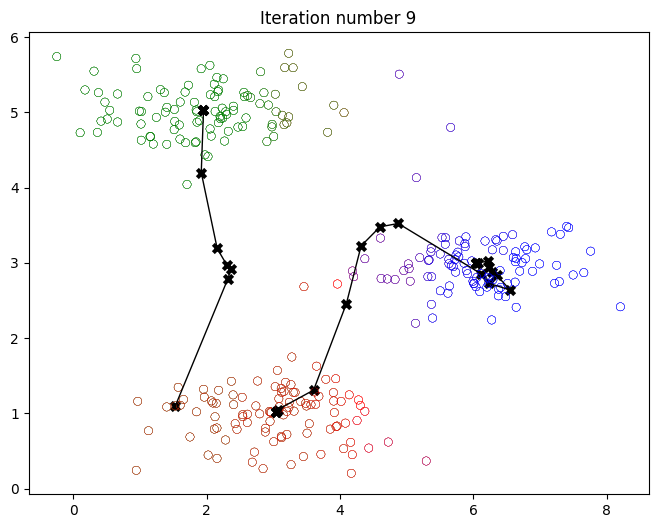

In [11]:
# Ejecuta esta celda repetidamente para ver diferentes resultados.

# Definir número de centroides y número máximo de iteraciones
K = 3
max_iters = 10

# Definir centroides iniciales seleccionando ejemplos aleatorios del conjunto de datos
initial_centroids = kMeans_init_centroids(X, K)

# Ejecutar K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="4"></a>
## 4 - Compresión de imágenes con K-means

En este ejercicio, aplicarás K-means a la compresión de imágenes.

* En una representación de color de 24 bits de una imagen$^{2}$, cada píxel se representa como tres enteros sin signo de 8 bits (que van de 0 a 255) que especifican los valores de intensidad de rojo, verde y azul. Esta codificación se conoce como codificación RGB.
* Nuestra imagen contiene miles de colores, y en esta parte del ejercicio, reducirás el número de colores a 16.
* Al hacer esta reducción, es posible representar (comprimir) la foto de manera eficiente.
* Específicamente, solo necesitas almacenar los valores RGB de los 16 colores seleccionados, y para cada píxel de la imagen ahora solo necesitas almacenar el índice del color en esa ubicación (donde solo se requieren 4 bits para representar 16 posibilidades).

En esta parte, usarás el algoritmo K-means para seleccionar los 16 colores que se usarán para representar la imagen comprimida.
* Concretamente, tratarás cada píxel de la imagen original como un ejemplo de datos y usarás el algoritmo K-means para encontrar los 16 colores que mejor agrupan (cluster) los píxeles en el espacio RGB tridimensional.
* Una vez que hayas calculado los centroides de los clusters en la imagen, usarás los 16 colores para reemplazar los píxeles en la imagen original.

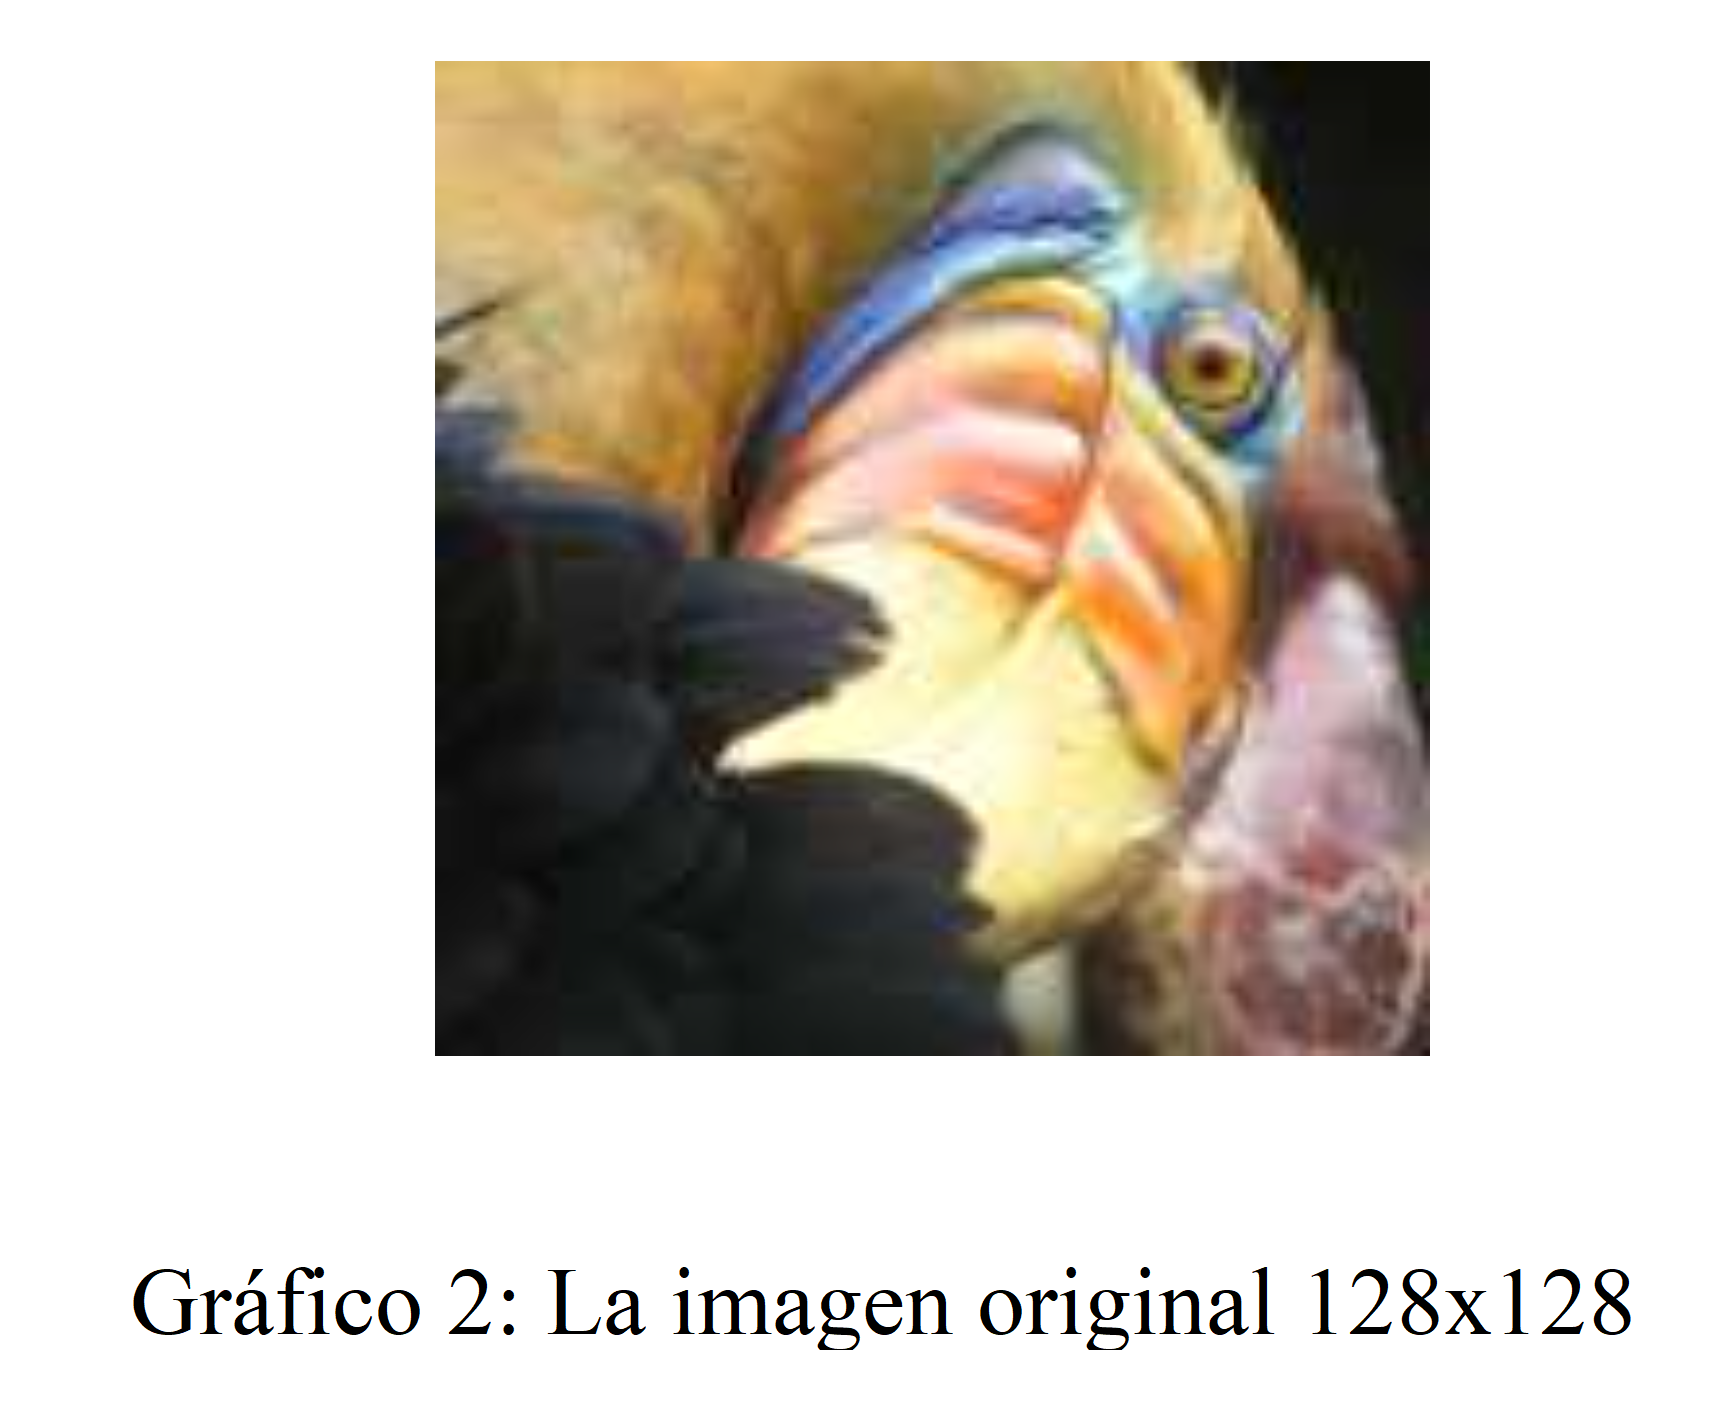

$^{2}$<sub>La foto proporcionada utilizada en este ejercicio pertenece a Frank Wouters y se utiliza con su permiso.</sub>

<a name="4.1"></a>
### 4.1 Conjunto de datos

**Cargar imagen**

Primero, usarás `matplotlib` para leer la imagen original, como se muestra a continuación.

In [12]:
# Cargar una imagen de un pájaro
original_img = plt.imread('bird_small.png')

**Visualizar imagen**

Puedes visualizar la imagen que acabas de cargar usando el siguiente código.

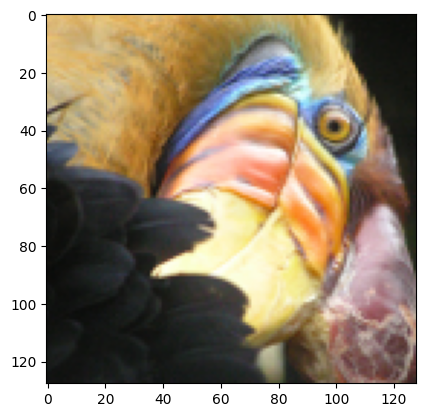

In [13]:
# Visualizar la imagen
plt.imshow(original_img)

**Verifica la forma(shape) de la variable**

Como siempre, imprime la forma(shape) de tu variable para familiarizarte más con los datos.

In [14]:
print("La forma(shape) de original_img es:", original_img.shape)

La forma(shape) de original_img es: (128, 128, 3)


Como puedes ver, esto crea una matriz tridimensional `original_img` donde
* los dos primeros índices identifican la posición de un píxel, y
* el tercer índice representa rojo, verde o azul.

Por ejemplo, `original_img[50, 33, 2]` da la intensidad azul del píxel en la fila 50 y columna 33.

#### Procesando datos

Para llamar a `run_kMeans`, primero necesitas transformar la matriz `original_img` en una matriz bidimensional.

* El siguiente código remodela la matriz `original_img` para crear una matriz $m \times 3$ de colores de píxeles (donde $m=16384 = 128\times128$)

*Nota: Si más adelante pruebas este ejercicio con un archivo JPG, primero necesitas dividir los valores de los píxeles por 255 para que estén en el rango 0 a 1. Esto no es necesario para archivos PNG (por ejemplo, `bird_small.png`) porque ya se cargan en el rango requerido (como se menciona en la [documentación de plt.imread()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)). Dejamos comentada una línea abajo para que puedas descomentarla si luego quieres probar con otro archivo.* 

In [15]:
# Dividir por 255 para que todos los valores estén en el rango 0 - 1 (no es necesario para archivos PNG)
# original_img = original_img / 255

# Remodelar la imagen en una matriz m x 3 donde m = número de píxeles
# (en este caso m = 128 x 128 = 16384)
# Cada fila contendrá los valores de los píxeles Rojo, Verde y Azul
# Esto nos da nuestra matriz de datos X_img sobre la que usaremos K-Means.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

<a name="4.2"></a>
### 4.2 K-Means en los píxeles de la imagen

Ahora, ejecuta la siguiente celda para ejecutar K-Means en la imagen preprocesada.

In [16]:
# Ejecuta tu algoritmo K-Means en estos datos
# Aquí deberías probar diferentes valores de K y max_iters
K = 16
max_iters = 10

# Usando la función que implementaste arriba.
initial_centroids = kMeans_init_centroids(X_img, K)

# Ejecutar K-Means - esto puede tardar un par de minutos dependiendo de K y max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteración 0/9
K-Means iteración 1/9
K-Means iteración 2/9
K-Means iteración 3/9
K-Means iteración 4/9
K-Means iteración 5/9
K-Means iteración 6/9
K-Means iteración 7/9
K-Means iteración 8/9
K-Means iteración 9/9


<Figure size 800x600 with 0 Axes>

In [17]:
print("Forma(shape) de idx:", idx.shape)
print("Centroide más cercano para los primeros cinco elementos:", idx[:5])

Forma(shape) de idx: (16384,)
Centroide más cercano para los primeros cinco elementos: [10 10 10 10 10]


El siguiente código graficará todos los colores encontrados en la imagen original. Como se mencionó antes, el color de cada píxel está representado por valores RGB, así que la gráfica debe tener 3 ejes -- R, G y B. Notarás muchos puntos que representan miles de colores en la imagen original. Los marcadores rojos representan los centroides después de ejecutar K-means. Estos serán los 16 colores que usarás para comprimir la imagen.

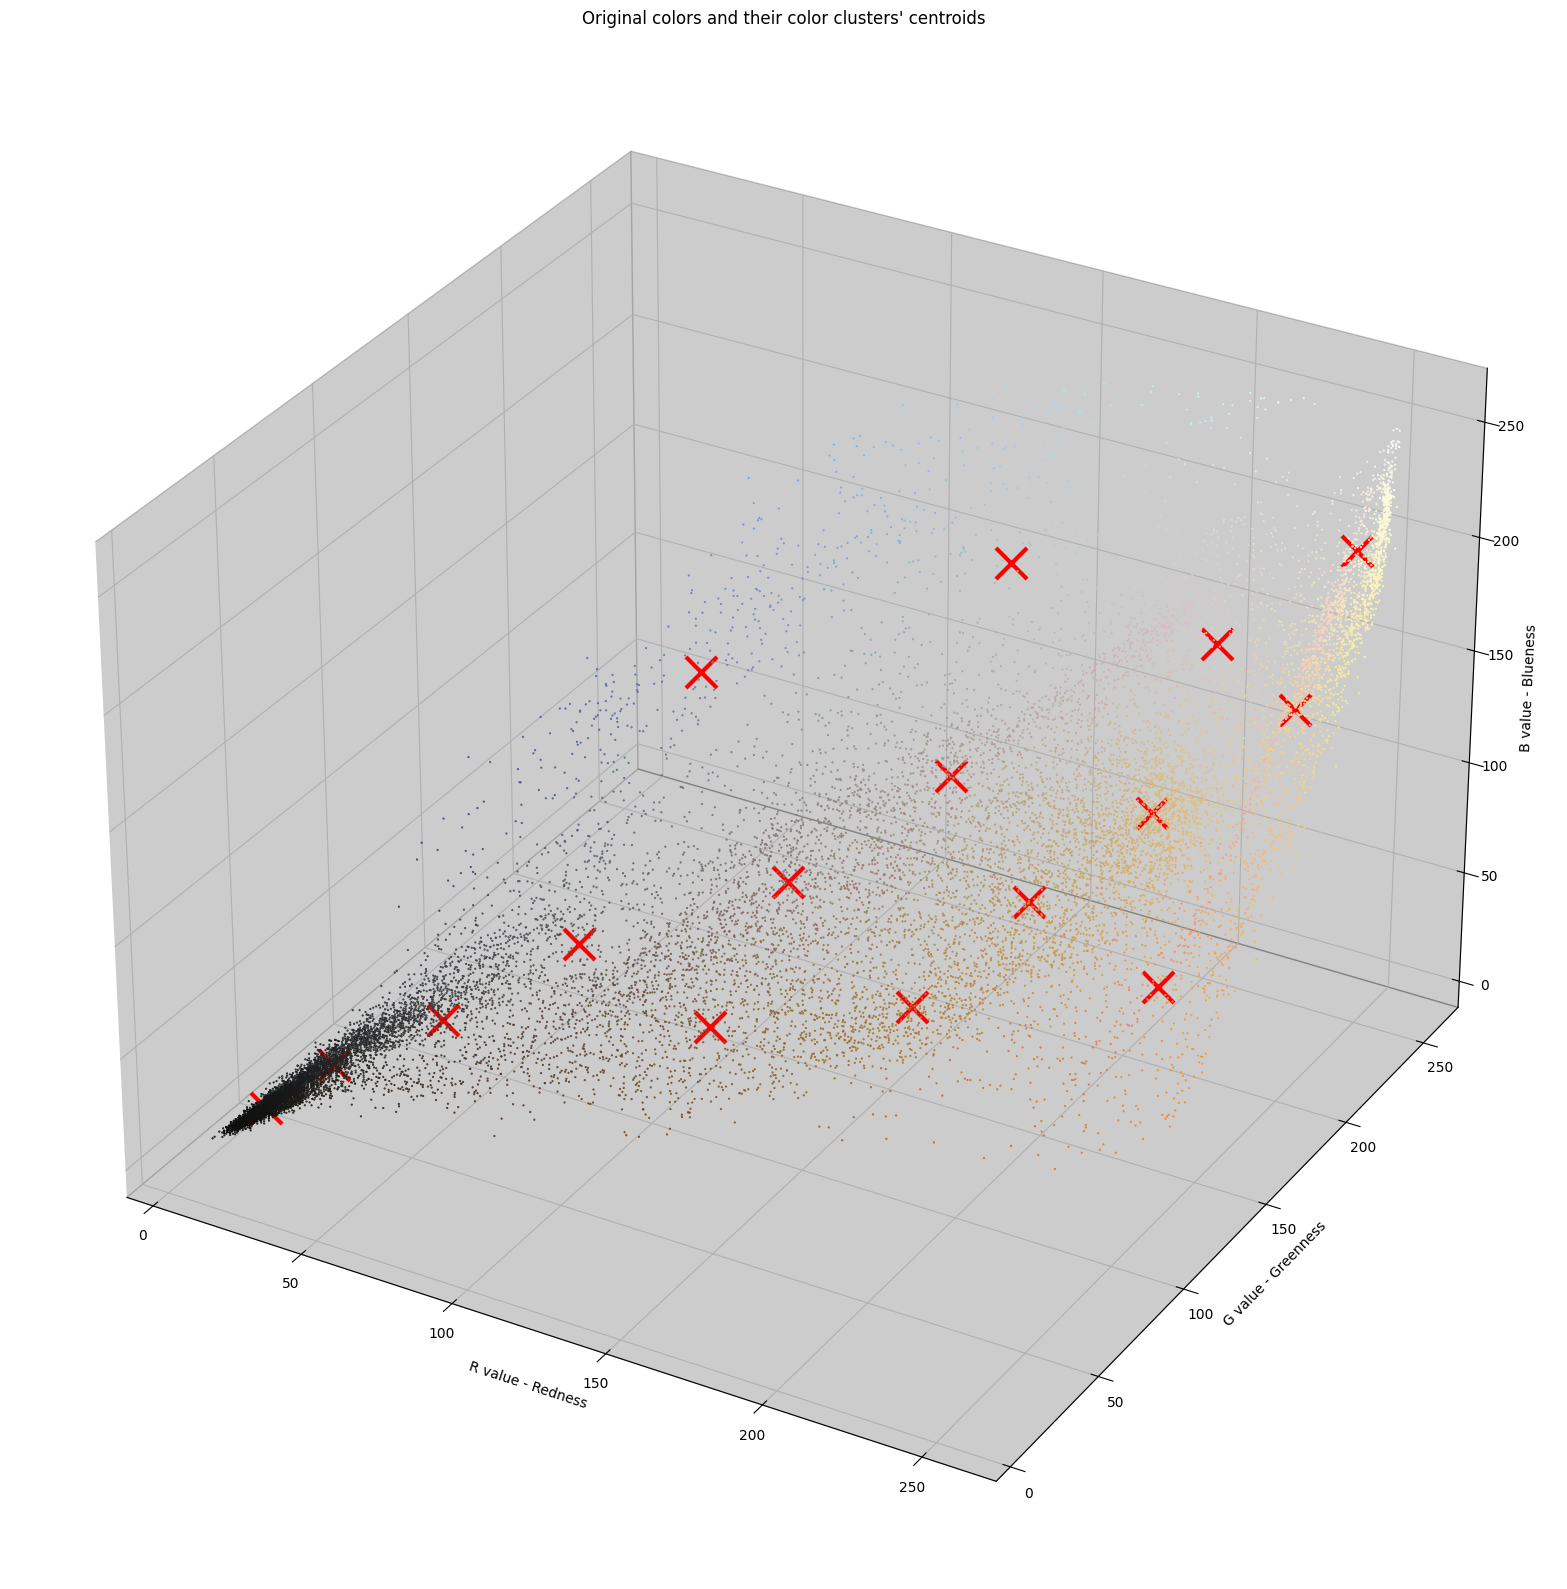

In [18]:
# Graficar los colores de la imagen y marcar los centroides
plot_kMeans_RGB(X_img, centroids, idx, K)

Puedes visualizar los colores en cada uno de los marcadores rojos (es decir, los centroides) arriba con la siguiente función. Solo verás estos colores cuando generes la nueva imagen en la siguiente sección. El número debajo de cada color es su índice y estos son los números que ves en el array `idx`.

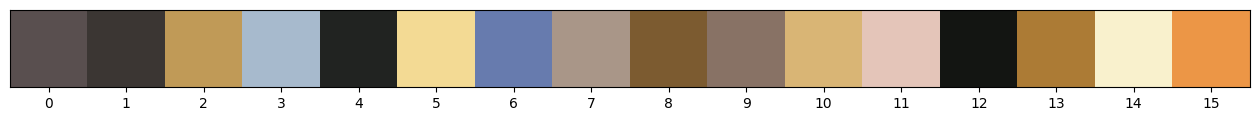

In [19]:
# Visualizar los 16 colores seleccionados
show_centroid_colors(centroids)

<a name="4.3"></a>
### 4.3 Comprimir la imagen


Después de encontrar los $K=16$ colores principales para representar la imagen, ahora puedes asignar cada posición de píxel a su centroide más cercano usando la función `find_closest_centroids`.
* Esto te permite representar la imagen original usando las asignaciones de centroides de cada píxel.
* Observa que has reducido significativamente la cantidad de bits necesarios para describir la imagen.
    * La imagen original requería 24 bits (es decir, 8 bits x 3 canales en codificación RGB) para cada una de las $128\times128$ posiciones de píxel, resultando en un tamaño total de $128 \times 128 \times 24 = 393,216$ bits.
    * La nueva representación requiere algo de almacenamiento adicional en forma de un diccionario de 16 colores, cada uno de los cuales requiere 24 bits, pero la imagen en sí solo requiere 4 bits por posición de píxel.
    * El número final de bits usados es por lo tanto $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, lo que corresponde a comprimir la imagen original por un factor de aproximadamente 6.

In [20]:
# Encontrar el centroide más cercano de cada píxel
idx = find_closest_centroids(X_img, centroids)

# Reemplazar cada píxel con el color del centroide más cercano
X_recovered = centroids[idx, :] 

# Remodelar la imagen a las dimensiones correctas
X_recovered = np.reshape(X_recovered, original_img.shape) 

Finalmente, puedes ver los efectos de la compresión reconstruyendo la imagen basándote solo en las asignaciones de centroides.
* Específicamente, reemplazaste cada píxel con el valor del centroide asignado a él.
* La Figura 3 muestra una reconstrucción de ejemplo. Aunque la imagen resultante conserva la mayoría de las características de la original, también verás algunos artefactos de compresión debido a la menor cantidad de colores utilizados.

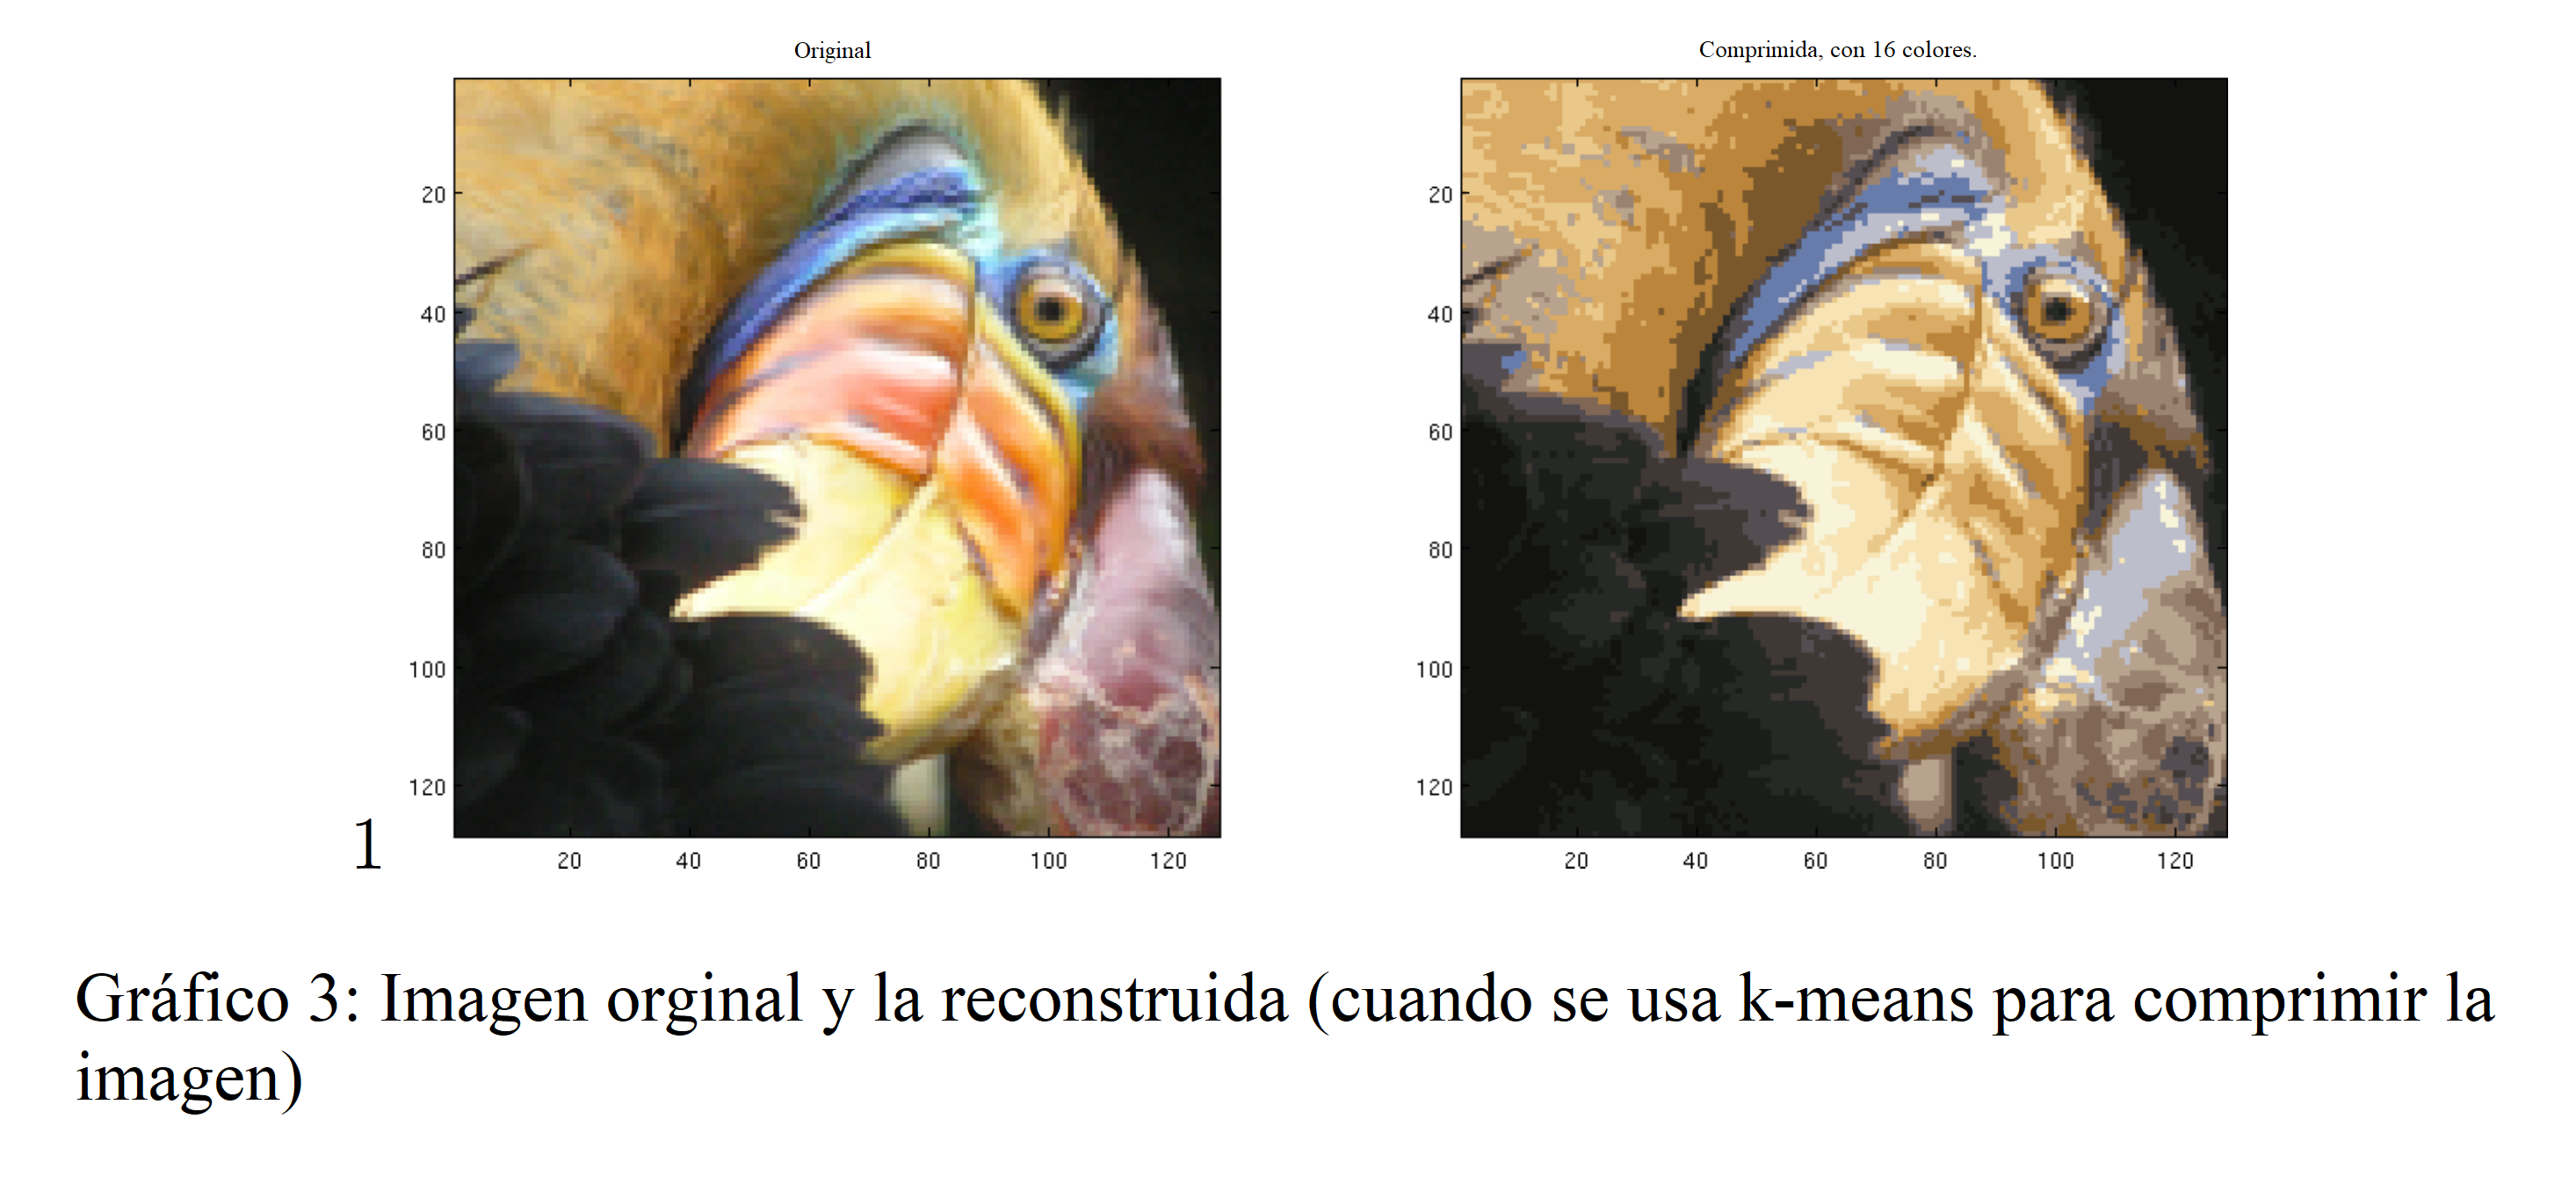

* Ejecuta el siguiente código para ver cómo se reconstruye la imagen usando los 16 colores seleccionados anteriormente.

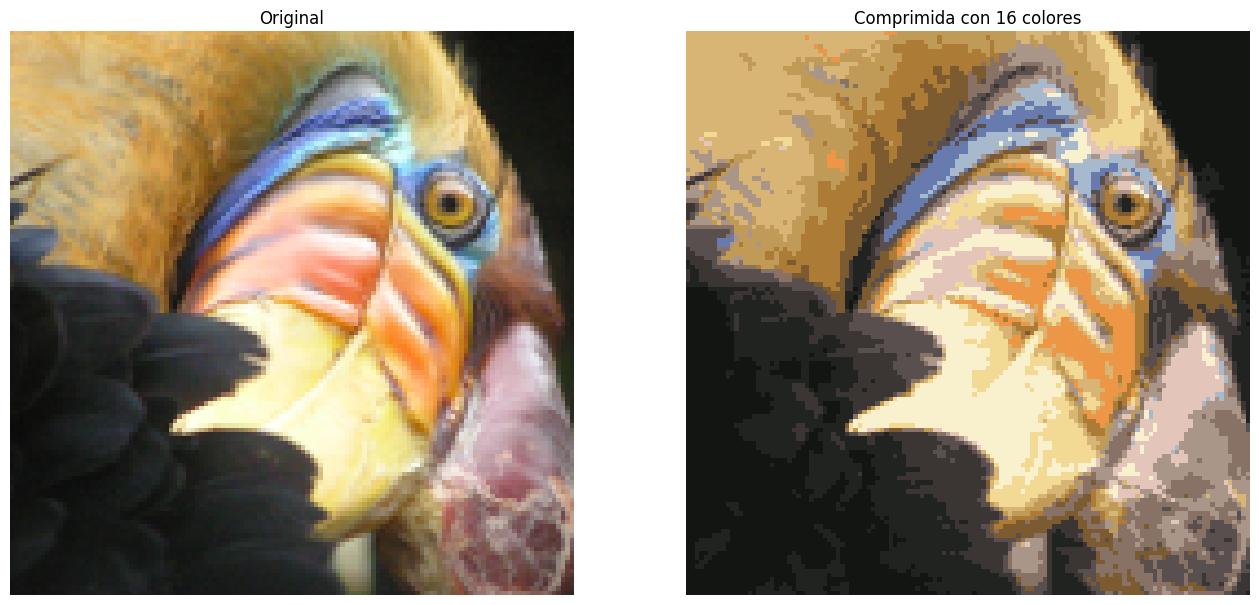

In [21]:
# Mostrar imagen original
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Mostrar imagen comprimida
ax[1].imshow(X_recovered)
ax[1].set_title('Comprimida con %d colores'%K)
ax[1].set_axis_off()

## Conclusiones del ejercicio sobre K-Means Clustering

### Conclusión de fragmentos de código relevantes

- **Importación y preparación**  
  Se cargaron `numpy`, `matplotlib.pyplot` y utilidades del notebook. Esto habilitó operaciones vectorizadas para distancias, actualización de centroides y visualizaciones de las iteraciones.

- **`find_closest_centroids(X, centroids)`**  
  Para cada ejemplo, se calcula la **distancia euclidiana al cuadrado** a todos los centroides y se asigna el índice del centroide mínimo. Este es el paso de **asignación** en K-Means. Complejidad por iteración: `O(m·K·n)`.

- **`compute_centroids(X, idx, K)`**  
  Recalcula cada centroide como el **promedio** de los puntos que le fueron asignados. Este es el paso de **actualización**. Se contempló el caso en que un clúster quede vacío (no promedia).

- **`run_kMeans(X, initial_centroids, max_iters, plot_progress)`**  
  Orquesta el ciclo asignación ↔ actualización, y permite graficar el progreso. Convergemos cuando los centroides ya no cambian de manera significativa o se cumplen las iteraciones máximas.

- **Cuantización de colores (parte final)**  
  El uso de K-Means para **reducir la paleta** de la imagen demuestra un caso práctico de compresión con pérdida: cada píxel se aproxima al centroide del clúster correspondiente.

### Conclusión final de la actividad

El ejercicio permitió **entender y verificar** el ciclo básico de K-Means: asignar puntos al centroide más cercano y **reubicar** los centroides con el promedio de sus puntos. Vimos cómo, con un `K` fijo, el algoritmo converge a una partición estable y cómo la **visualización** por iteraciones facilita interpretar el comportamiento de los grupos. La cuantización de colores ilustró un caso de uso real, donde K-Means entrega un **compromiso** claro entre fidelidad visual y reducción de complejidad.

---

<div style="background:#c8f7c5;padding:14px;border-left:6px solid #2e7d32;color:#111;">
  <h3 style="margin:0 0 8px 0;">Elementos importantes a tener en cuenta</h3>
  <ul style="margin:0 0 0 18px;">
    <li><strong>Escalado de características:</strong> si las variables están en escalas distintas, normalizar evita que una dimensión domine las distancias.</li>
    <li><strong>Inicialización:</strong> los centroides iniciales condicionan el óptimo local. En producción conviene <em>k-means++</em> o múltiples reinicios.</li>
    <li><strong>Elección de K:</strong> usar codo, silueta o criterios de validación externa cuando sea posible.</li>
    <li><strong>Clusters vacíos:</strong> pueden aparecer; re-inicializarlos o conservar el centroide previo es una decisión práctica según el caso.</li>
    <li><strong>Outliers:</strong> K-Means es sensible al ruido; detectar y tratar atípicos mejora la estabilidad.</li>
  </ul>
</div>

<div style="background:#e3f2fd;padding:14px;border-left:6px solid #1565c0;color:#0b2c4d;margin-top:14px;">
  <h3 style="margin:0 0 8px 0;">Lecciones aprendidas</h3>
  <ul style="margin:0 0 0 18px;">
    <li>La separación real de grupos depende más de la <strong>geometría de los datos</strong> que del número de iteraciones.</li>
    <li>La opción de <em>plot_progress</em> acelera el entendimiento: ver el movimiento de centroides explica por qué a veces converge rápido y otras no.</li>
    <li>El caso de imagen confirma que K-Means funciona bien cuando los clústeres son aproximadamente <strong>esféricos</strong> en el espacio de características.</li>
  </ul>
</div>

<div style="background:#ffebee;padding:14px;border-left:6px solid #c62828;color:#3b0d0d;margin-top:14px;">
  <h3 style="margin:0 0 8px 0;">Impacto en el día a día y valor para la industria</h3>
  <ul style="margin:0 0 0 18px;">
    <li><strong>Segmentación de clientes:</strong> marketing y ventas pueden personalizar campañas y precios.</li>
    <li><strong>Compresión/agrupación de imágenes:</strong> catálogos y apps móviles con menor peso y latencia.</li>
    <li><strong>Agrupamiento de logs:</strong> facilita detectar patrones operativos antes de anomalías.</li>
    <li><strong>Importancia en el rol de tecnología :</strong> habilita <em>pilotajes rápidos</em> de segmentación, priorización de tickets y <em>feature engineering</em> (clusters como variables) que aportan un <strong>diferencial</strong> en entregables y tiempos.</li>
  </ul>
</div>

<br>

**Realizado por:**  
Cindy Liliana Vargas Duque  
Jesús Ariel González Bonilla
